# Wheat Seeds Quality Prediction using Machine Learning Algorithm 

# Wheat Seeds Dataset
- The Wheat Seeds Dataset involves the prediction of species given measurements of seeds from different varieties of wheat.

- It is a multi-class (3-class) classification problem.There are 7 input variables and 1 output variable. 
- The variable names are as follows:


- Area
- Perimeter
- Compactness
- Length of kernel.
- Width of kernel.
- Asymmetry coefficient.
- Length of kernel groove.
- Class (1, 2, 3).

## Importing the libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv("Wheat class.csv")
df.head()

,Area,Perimeter,Compactness,Length of Kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove,Class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


## Data Visualization

<AxesSubplot:xlabel='Area', ylabel='Perimeter'>

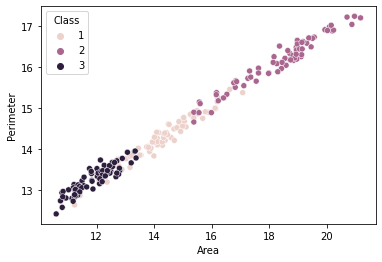

In [6]:
sns.scatterplot(x="Area",y="Perimeter",hue="Class",data=df)

<AxesSubplot:xlabel='Area', ylabel='Compactness'>

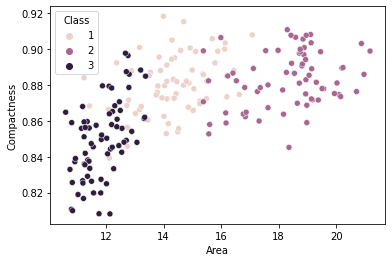

In [7]:
sns.scatterplot(x="Area",y="Compactness",hue="Class",data=df)

<AxesSubplot:xlabel='Area', ylabel='Length of Kernel'>

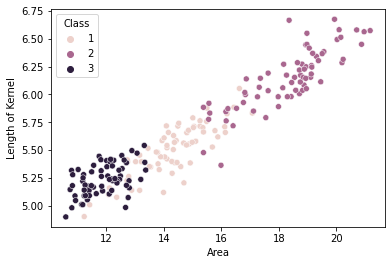

In [8]:
sns.scatterplot(x="Area",y="Length of Kernel",hue="Class",data=df)

<AxesSubplot:xlabel='Area', ylabel='Width of kernel'>

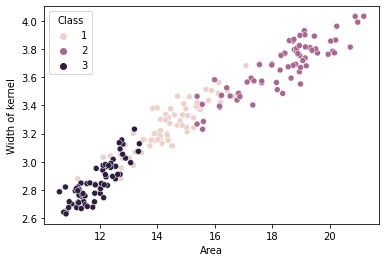

In [9]:
sns.scatterplot(x="Area",y="Width of kernel",hue="Class",data=df)

<AxesSubplot:xlabel='Area', ylabel='Asymmetry coefficient'>

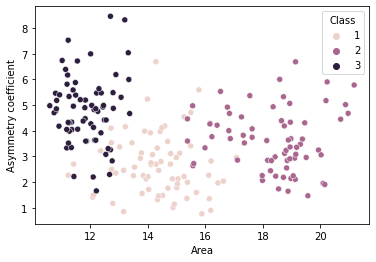

In [10]:
sns.scatterplot(x="Area",y="Asymmetry coefficient",hue="Class",data=df)

<AxesSubplot:xlabel='Area', ylabel='Length of kernel groove'>

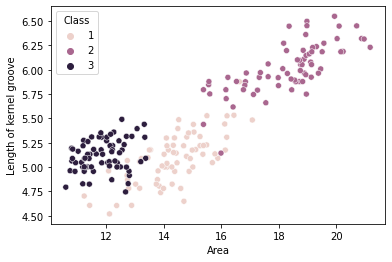

In [11]:
sns.scatterplot(x="Area",y="Length of kernel groove",hue="Class",data=df)

## From the visualization we conclude that
-Area and permiter together complete distinguishes the differnt classes

- Class 2 can be misinterpreted with class 1 & 3  when compactness is used as main feature

- Class 3 can be misinterpreted with class 2 when Width of kernel is used as main feature 

- Class 2 can be misinterpreted with class 1 when length of kernel is used as main feature

- Classes mixes up a little when Asymmerty coefficient or Length of kernel grove is taken as the main features  narrow gaps available to distinguish between classes .

## Train-Test set splitting

In [12]:
y=df.Class
df.drop("Class",axis=1,inplace=True)
X=df

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)
print("Train-Test splitting complete")

Train-Test splitting complete


In [14]:
X_train

,Area,Perimeter,Compactness,Length of Kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove
106,18.85,16.17,0.9056,6.152,3.806,2.843,6.200
151,12.01,13.52,0.8249,5.405,2.776,6.992,5.270
94,18.36,16.52,0.8452,6.666,3.485,4.933,6.448
84,19.51,16.71,0.8780,6.366,3.801,2.962,6.185
193,10.82,12.83,0.8256,5.180,2.630,4.853,5.089
...,...,...,...,...,...,...,...
203,12.70,13.41,0.8874,5.183,3.091,8.456,5.000
137,15.57,15.15,0.8527,5.920,3.231,2.640,5.879
72,17.26,15.73,0.8763,5.978,3.594,4.539,5.791
140,13.07,13.92,0.8480,5.472,2.994,5.304,5.395


In [15]:
X_test.shape #To check how many entries are in test set

(42, 7)

# Model Training 

In [16]:
from sklearn.metrics import accuracy_score

## 1) Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression
model_1 = LogisticRegression( max_iter=400) # we need to set max_iter because the iteration will reach to it's default limit which will give us warning
model_1.fit(X_train,y_train)
y_pred1=model_1.predict(X_test)
print("Model Trained")

Model Trained


In [18]:
acc_1 = accuracy_score(y_pred1,y_test)
print("Accuracy= ",acc_1*100,"%")

Accuracy=  97.61904761904762 %


## 2) KNN Algorithm

Text(0, 0.5, 'Error Rate')

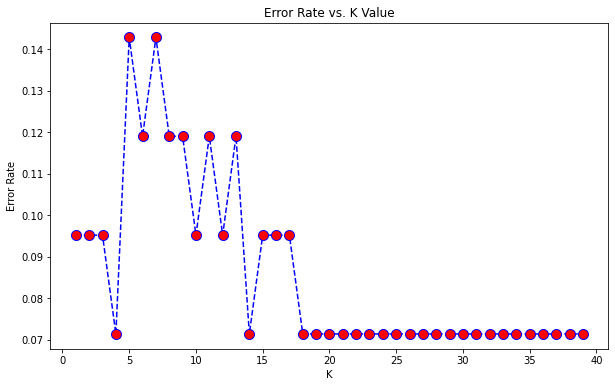

In [19]:
from sklearn.neighbors import KNeighborsClassifier
error_rate = []
for i in range(1, 40):
	
	knn = KNeighborsClassifier(n_neighbors = i)
	knn.fit(X_train, y_train)
	pred_i = knn.predict(X_test)
	error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize =(10, 6))
plt.plot(range(1, 40), error_rate, color ='blue',
				linestyle ='dashed', marker ='o',
		markerfacecolor ='red', markersize = 10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

### Error rate is less when n_neighbors is 3 so now training the model by setting the parameters

In [20]:

model_2=KNeighborsClassifier(n_neighbors=3,algorithm="brute")
model_2 = model_2.fit(X_train,y_train)
y_pred2=model_2.predict(X_test)
print("Model Trained")

Model Trained


In [21]:
acc_2 = accuracy_score(y_pred2,y_test)
print("Accuracy= ",acc_2*100,"%")

Accuracy=  90.47619047619048 %


In [22]:
Accuracy_s = pd.DataFrame({"Model" : ["Logistic Regression","KNN Algorithm"], 
                     "Accuracy" : [acc_1,acc_2]})
Accuracy_s

,Model,Accuracy
0,Logistic Regression,0.976190
1,KNN Algorithm,0.904762


<AxesSubplot:xlabel='Model', ylabel='Accuracy'>

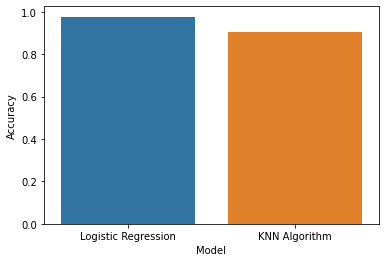

In [23]:
sns.barplot(x="Model",y="Accuracy",data=Accuracy_s)

## We will use Logistic Regression model for this dataset as it gives us 97.62% accuracy  